#Data Preprocessing

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [ ]:
file_url = "https://raw.githubusercontent.com/Moyoshabz/CustomerChurn/main/Telco_Customer_Churn.csv"
df = pd.read_csv(file_url)

In [ ]:
print(df.head())

   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

In [ ]:
print(df.isnull().sum())

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
# Data Validation - Checking for NaNs
nan_rows = df[df.isnull().any(axis=1)]
print(nan_rows)

Empty DataFrame
Columns: [customerID, gender, SeniorCitizen, Partner, Dependents, tenure, PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract, PaperlessBilling, PaymentMethod, MonthlyCharges, TotalCharges, Churn]
Index: []

[0 rows x 21 columns]


In [ ]:
#dropping unwanted columns
df.drop(['customerID'], axis=1, inplace=True)

In [ ]:
#Converting the datatype for the TotalCharge from object to float
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df.drop('TotalCharges', axis=1, inplace=True)

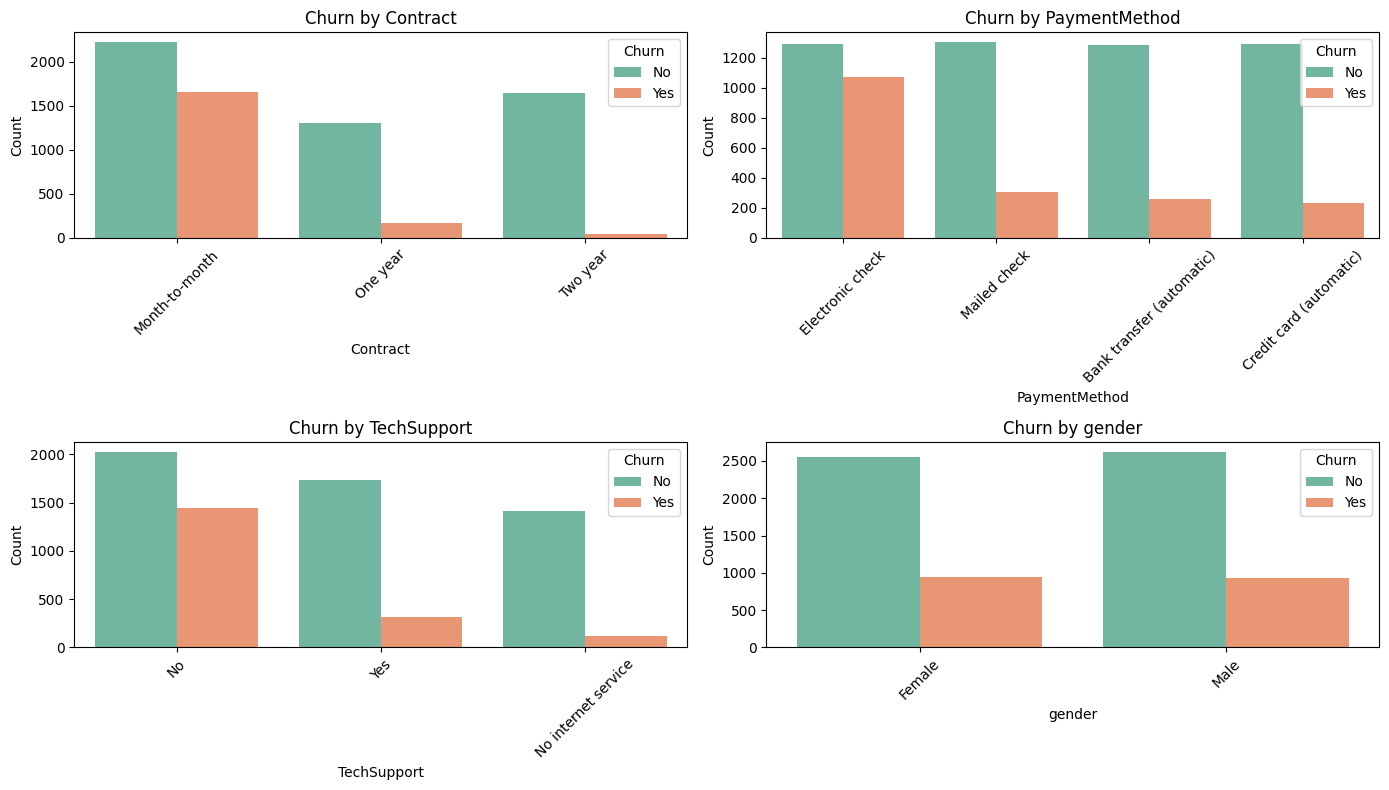

In [ ]:
#EDA
Categorical_features = ['Contract', 'PaymentMethod', 'TechSupport', 'gender']
n_features = len(Categorical_features)

# Creating a subplot grid
fig, axes = plt.subplots(2, 2, figsize=(14, 8))
axes = axes.flatten()  # flatten 2D array to 1D for easy looping

for i, col in enumerate(Categorical_features):
    sns.countplot(data=df, x=col, hue='Churn', palette='Set2', ax=axes[i])
    axes[i].set_title(f'Churn by {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Count")
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

In [ ]:
#Encoding the binary columns in the dataset
from sklearn.preprocessing import LabelEncoder, StandardScaler
binary_cols = ['gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']
for col in binary_cols:
    df[col] = LabelEncoder().fit_transform(df[col])

In [ ]:
# Encoding the columns with multiple categories
df = pd.get_dummies(df, columns=[
    'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
    'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
    'Contract', 'PaymentMethod'
], drop_first=True)

In [ ]:
scaler = StandardScaler()
df[['tenure', 'MonthlyCharges']] = scaler.fit_transform(df[['tenure', 'MonthlyCharges']])

In [ ]:
df['Churn'] = LabelEncoder().fit_transform(df['Churn'])

# Data Visualization

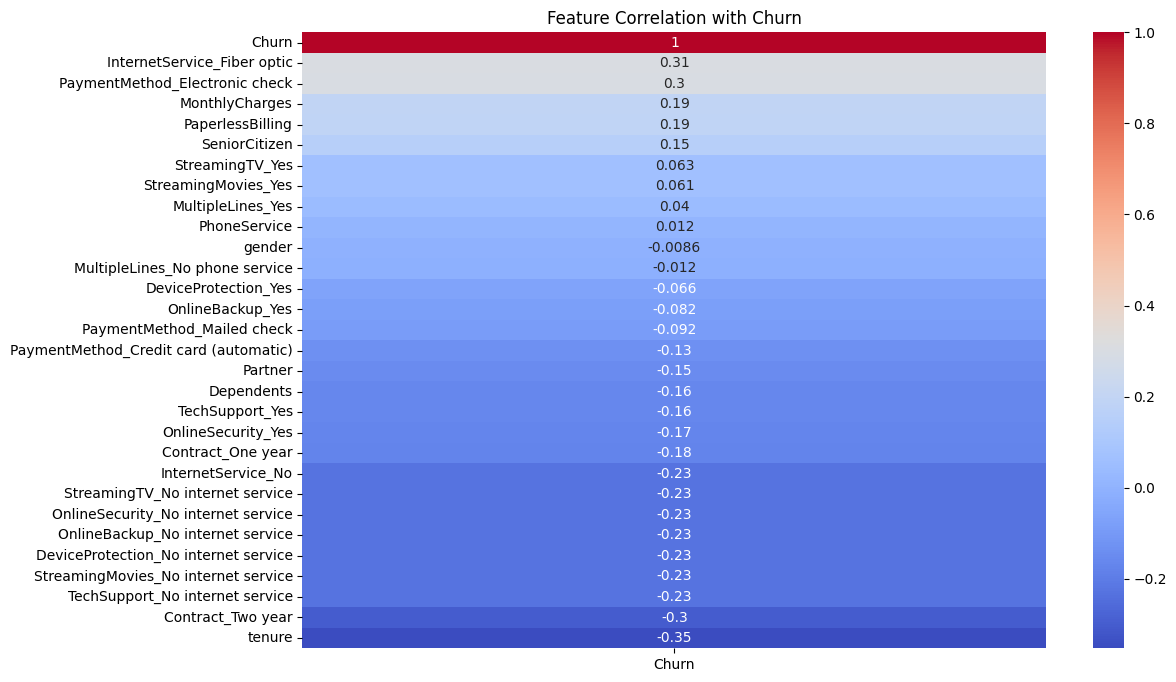

In [ ]:
#Features Correlated with Churn before Prediction
correlation_matrix = df.corr()
plt.figure(figsize=(12,8))
sns.heatmap(correlation_matrix[['Churn']].sort_values('Churn', ascending=False),
            annot=True, cmap='coolwarm')
plt.title('Feature Correlation with Churn')
plt.show()

##Insight

Top 5 Churn Drivers:
1. InternetService(Fibre Optics = 0.31)
2. PaymentMethod_ElectronicCheck = 0.3
3. MonthlyCharges =0.19
4. PaperlessBilling =0.19
5. Senior Citizen =0.15

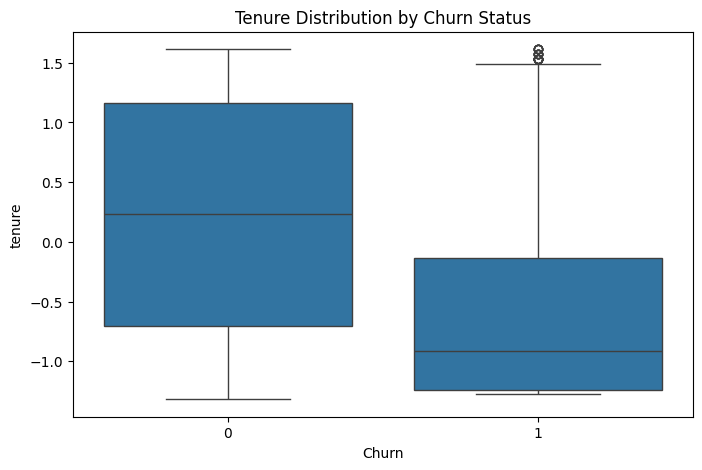

In [ ]:
#Understanding how tenure impact customer churn
plt.figure(figsize=(8, 5))
sns.boxplot(x='Churn', y='tenure', data=df)
plt.title("Tenure Distribution by Churn Status")
plt.show()

### Insight
Customers with shorter tensure churn more

/tmp/ipython-input-16-947003823.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Contract_One year', y='Churn', data=df, ci=None)


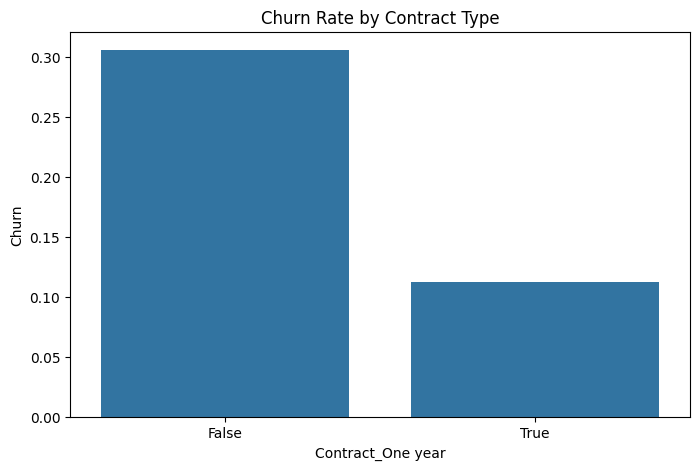

In [ ]:
plt.figure(figsize=(8, 5))
sns.barplot(x='Contract_One year', y='Churn', data=df, ci=None)
plt.title("Churn Rate by Contract Type")
plt.show()

### Insight
Month-to-month contracts have higher churn rates than yearly contracts.

In [ ]:
#Handling class imbalanced, first we will observe the churn target column
print(df['Churn'].value_counts())


Churn
0    5174
1    1869
Name: count, dtype: int64


#Model Building

In [ ]:
from sklearn.model_selection import train_test_split
X = df.drop('Churn', axis=1)
y = df['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
#standard features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, f1_score
def evaluate_model(model, X_test, y_test):
    try:
        if 'tensorflow' in str(type(model)).lower():
            y_prob = model.predict(X_test).ravel()
            y_pred = (y_prob >= 0.5).astype(int)
        else:
            y_pred = model.predict(X_test)
            if hasattr(model, 'predict_proba'):
                y_prob = model.predict_proba(X_test)[:, 1]
            else:
                y_prob = model.decision_function(X_test)

        print("Confusion Matrix:")
        print(confusion_matrix(y_test, y_pred))
        print("\nClassification Report:")
        print(classification_report(y_test, y_pred))
        print("ROC AUC Score:", roc_auc_score(y_test, y_prob))

    except Exception as e:
        print("Error during evaluation:", e)

In [ ]:
#Logistic regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(class_weight='balanced', random_state=42, max_iter=1000)
lr.fit(X_train_resampled, y_train_resampled)
evaluate_model(lr, X_test, y_test)

Confusion Matrix:
[[1142  397]
 [ 109  465]]

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.74      0.82      1539
           1       0.54      0.81      0.65       574

    accuracy                           0.76      2113
   macro avg       0.73      0.78      0.73      2113
weighted avg       0.81      0.76      0.77      2113

ROC AUC Score: 0.8557821835528296


In [ ]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(class_weight='balanced', random_state=42)
dt.fit(X_train_resampled, y_train_resampled)
evaluate_model(dt, X_test, y_test)

Confusion Matrix:
[[1202  337]
 [ 244  330]]

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.78      0.81      1539
           1       0.49      0.57      0.53       574

    accuracy                           0.73      2113
   macro avg       0.66      0.68      0.67      2113
weighted avg       0.74      0.73      0.73      2113

ROC AUC Score: 0.6777688349147485


In [ ]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(class_weight='balanced', random_state=42)
rf.fit(X_train_resampled, y_train_resampled)
evaluate_model(rf, X_test, y_test)

Confusion Matrix:
[[1319  220]
 [ 253  321]]

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.86      0.85      1539
           1       0.59      0.56      0.58       574

    accuracy                           0.78      2113
   macro avg       0.72      0.71      0.71      2113
weighted avg       0.77      0.78      0.77      2113

ROC AUC Score: 0.8315357046636465


In [ ]:
#Building the Neural Network
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# Setting seeds
np.random.seed(42)
tf.random.set_seed(42)

early_stop = EarlyStopping(patience=5, restore_best_weights=True)


model = Sequential([
    Dense(64, input_shape=(X_train_resampled.shape[1],), activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])


model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train_resampled, y_train_resampled,
                    epochs=50,
                    batch_size=32,
                    validation_split=0.2,
                    callbacks=[early_stop],
                    shuffle=True,
                    verbose=1)


Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


182/182 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6172 - loss: 0.6630 - val_accuracy: 0.6706 - val_loss: 0.6960
Epoch 2/50
182/182 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7529 - loss: 0.5027 - val_accuracy: 0.7221 - val_loss: 0.6002
Epoch 3/50
182/182 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7646 - loss: 0.4774 - val_accuracy: 0.7166 - val_loss: 0.5951
Epoch 4/50
182/182 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7647 - loss: 0.4799 - val_accuracy: 0.7070 - val_loss: 0.5896
Epoch 5/50
182/182 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7711 - loss: 0.4687 - val_accuracy: 0.7043 - val_loss: 0.5947
Epoch 6/50
182/182 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7766 - loss: 0.4581 - val_accuracy: 0.7008 - val_loss: 0.5730
Epoch 7/50
182/182 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7781 - loss: 0.4611 - val_accuracy: 0.7008 - val_loss: 0.5780
Epoch 8/50
182/182 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7848 - loss: 0.4607 - val_accuracy: 0.6939 - val_

In [ ]:
# Predicting the probabilities and classes
y_prob_nn = model.predict(X_test).ravel()
y_pred_nn = (y_prob_nn >= 0.5).astype(int)

# Evaluation
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_nn))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_nn))

print("ROC AUC Score:", roc_auc_score(y_test, y_prob_nn))

67/67 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
Confusion Matrix:
[[1305  234]
 [ 191  383]]

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.85      0.86      1539
           1       0.62      0.67      0.64       574

    accuracy                           0.80      2113
   macro avg       0.75      0.76      0.75      2113
weighted avg       0.80      0.80      0.80      2113

ROC AUC Score: 0.8493795464270432


67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


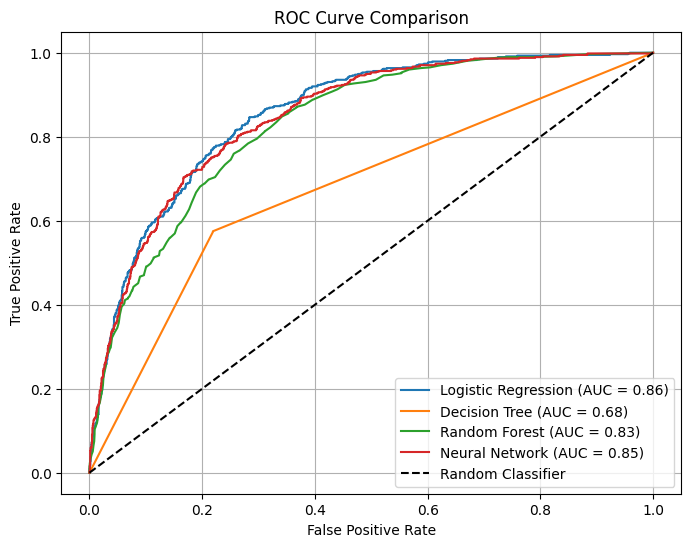

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))

# Logistic Regression Model
y_prob_lr = lr.predict_proba(X_test)[:, 1]
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_prob_lr)
plt.plot(fpr_lr, tpr_lr, label=f"Logistic Regression (AUC = {auc(fpr_lr, tpr_lr):.2f})")

# Decision Tree Model
y_prob_dt = dt.predict_proba(X_test)[:, 1]
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_prob_dt)
plt.plot(fpr_dt, tpr_dt, label=f"Decision Tree (AUC = {auc(fpr_dt, tpr_dt):.2f})")

# Random Forest Model
y_prob_rf = rf.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)
plt.plot(fpr_rf, tpr_rf, label=f"Random Forest (AUC = {auc(fpr_rf, tpr_rf):.2f})")

# Neural Network Model
y_prob_nn = model.predict(X_test).ravel()
fpr_nn, tpr_nn, _ = roc_curve(y_test, y_prob_nn)
plt.plot(fpr_nn, tpr_nn, label=f"Neural Network (AUC = {auc(fpr_nn, tpr_nn):.2f})")

# Plotting the ROC curve
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend(loc="lower right")
plt.grid()
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def get_model_metrics(name, y_true, y_pred):
    return {
        "Model": name,
        "Accuracy": accuracy_score(y_true, y_pred),
        "Precision": precision_score(y_true, y_pred),
        "Recall": recall_score(y_true, y_pred),
        "F1 Score": f1_score(y_true, y_pred)
    }

In [ ]:
results = []

# Logistic Regression Model
y_pred_lr = lr.predict(X_test)
results.append(get_model_metrics("Logistic", y_test, y_pred_lr))

# Decision Tree Model
y_pred_dt = dt.predict(X_test)
results.append(get_model_metrics("Decision Tree", y_test, y_pred_dt))

# Random Forest Model
y_pred_rf = rf.predict(X_test)
results.append(get_model_metrics("Random Forest", y_test, y_pred_rf))

# Neural Network Model
y_pred_nn = (model.predict(X_test).ravel() >= 0.5).astype(int)
results.append(get_model_metrics("Neural Network", y_test, y_pred_nn))

67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


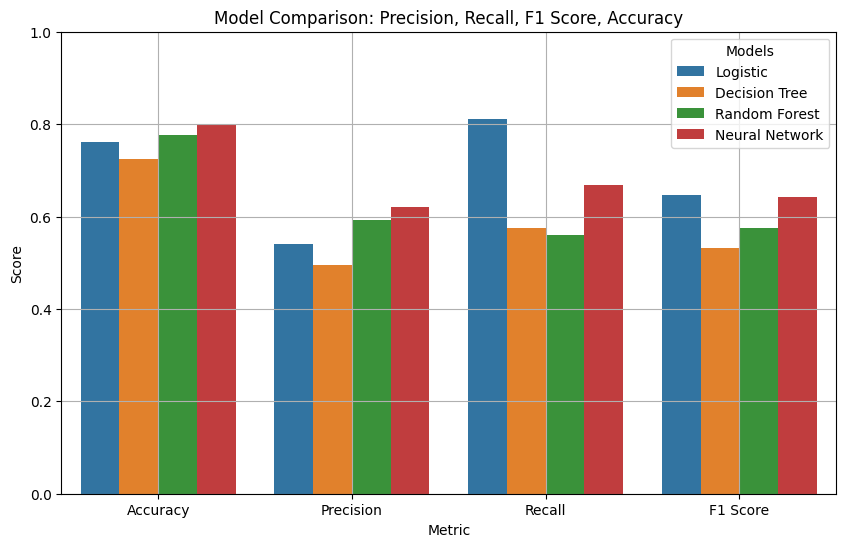

In [ ]:
import pandas as pd
import seaborn as sns

df_results = pd.DataFrame(results)
df_results_melted = df_results.melt(id_vars='Model', var_name='Metric', value_name='Score')

plt.figure(figsize=(10, 6))
sns.barplot(data=df_results_melted, x='Metric', y='Score', hue='Model')
plt.title("Model Comparison: Precision, Recall, F1 Score, Accuracy")
plt.ylim(0, 1)
plt.legend(title="Models")
plt.grid(True)
plt.show()

# Model Selection

In [ ]:
best_model_f1 = df_results.loc[df_results["F1 Score"].idxmax()]

print("Best Model Based on F1 Score:")
print(best_model_f1)

Best Model Based on F1 Score:
Model        Logistic
Accuracy      0.76053
Precision    0.539443
Recall       0.810105
F1 Score     0.647632
Name: 0, dtype: object


### Insight
Logistic Regression could be the best model choice based on F1 score and about not missing churners because of its high recall, however we it comes to the most balanced and strongest all-around performance, Neutral Network is the best choice.

In [ ]:
#Selection of the neural network model based on deeper analysis
best_model = df_results[df_results["Model"] == "Neural Network"].iloc[0]

print("Final Selected Model (based on analysis, not just one metric):")
print(best_model)

Final Selected Model (based on analysis, not just one metric):
Model        Neural Network
Accuracy           0.798864
Precision          0.620746
Recall             0.667247
F1 Score           0.643157
Name: 3, dtype: object
